In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.insert(1, 'readmpr_EIS')
np.set_printoptions(threshold=sys.maxsize)

In [2]:
from galvani import BioLogic
from read_mpr import searchmpr, mpr_to_pandas

# searchmpr(filepath, contains) (optional parameters) -> returns all .mpr file within filepath / if it contains smth
# mpr_to_pandas(mprfiles, filepath) convert the .mpr files into pandas dataframes

from EIS_DataProcessing import generateNewColumn, generateNewColumnVar2, selectMeasureColumn, mergeDfs
# filter data and generate new column for label

In [3]:
filepath = "./GCPL"
files = searchmpr(filepath)
dfs = mpr_to_pandas(files, filepath)

In [5]:
# merge data

merged = mergeDfs(dfs)

In [6]:
merged

,flags,Ns,time/s,dQ/mA.h,(Q-Qo)/mA.h,control/V/mA,Ewe/V,I Range,Q charge/discharge/mA.h,half cycle
0,15,0,1.680460e+03,-3.409833e-10,-3.409833e-10,0.00,-0.161267,115,-3.409833e-10,0
1,15,0,1.685460e+03,0.000000e+00,-3.409833e-10,0.00,-0.161267,115,-3.409833e-10,0
2,31,0,1.690486e+03,0.000000e+00,-3.409833e-10,0.02,0.173130,117,-3.409833e-10,0
3,53,1,1.690488e+03,1.106957e-08,1.072859e-08,0.02,0.184352,117,1.072859e-08,0
4,21,1,1.695488e+03,2.772917e-05,2.773990e-05,0.02,0.867360,117,2.773990e-05,0
...,...,...,...,...,...,...,...,...,...,...
2625457,7,1,1.390996e+06,0.000000e+00,-1.766036e-01,0.00,0.025843,115,-2.546883e+00,0
2625458,7,1,1.391001e+06,0.000000e+00,-1.766036e-01,0.00,0.025882,115,-2.546883e+00,0
2625459,7,1,1.391006e+06,0.000000e+00,-1.766036e-01,0.00,0.025882,115,-2.546883e+00,0
2625460,7,1,1.391011e+06,0.000000e+00,-1.766036e-01,0.00,0.026000,115,-2.546883e+00,0


# Data Processing

<AxesSubplot:xlabel='time/s', ylabel='Ewe/V'>

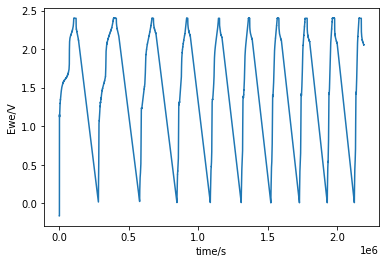

In [82]:
sns.lineplot(x=dfs[0]['time/s'], y=dfs[0]['Ewe/V'])

### extrema method

In [91]:
# import package for extrema
from scipy.signal import argrelmin, argrelextrema

In [135]:
df = dfs[2]
n = 150 # number of points to be checked before and after

In [136]:
# find local peaks

df['minima Ewe/V'] = df.iloc[argrelextrema(df['Ewe/V'].values, np.less_equal, order=n)[0]]['Ewe/V']
df['maxima Ewe/V'] = df.iloc[argrelextrema(df['Ewe/V'].values, np.greater_equal, order=n)[0]]['Ewe/V']

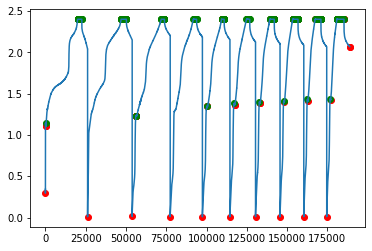

In [137]:
plt.scatter(df.index, df['minima Ewe/V'], c='r')
plt.scatter(df.index, df['maxima Ewe/V'], c='g')
plt.plot(df.index, df['Ewe/V'])
plt.show()

### using df.shift

In [153]:
df2 = dfs[0]

In [154]:
df2['min'] = df2['Ewe/V'][(df2['Ewe/V'].shift(1) >= df2['Ewe/V']) & (df2['Ewe/V'].shift(-1) >= df2['Ewe/V'])]
df2['max'] = df2['Ewe/V'][(df2['Ewe/V'].shift(1) <= df2['Ewe/V']) & (df2['Ewe/V'].shift(-1) <= df2['Ewe/V'])]

In [157]:
df2[df2['min'] != 'NaN']

,flags,Ns,time/s,dQ/mA.h,(Q-Qo)/mA.h,control/V/mA,Ewe/V,I Range,Q charge/discharge/mA.h,half cycle,minima Ewe/V,maxima Ewe/V,min,max
0,15,0,1.680460e+03,-3.409833e-10,-3.409833e-10,0.00,-0.161267,115,-3.409833e-10,0,-0.161267,NaN,NaN,NaN
1,15,0,1.685460e+03,0.000000e+00,-3.409833e-10,0.00,-0.161267,115,-3.409833e-10,0,-0.161267,NaN,-0.161267,NaN
2,31,0,1.690486e+03,0.000000e+00,-3.409833e-10,0.02,0.173130,117,-3.409833e-10,0,NaN,NaN,NaN,NaN
3,53,1,1.690488e+03,1.106957e-08,1.072859e-08,0.02,0.184352,117,1.072859e-08,0,NaN,NaN,NaN,NaN
4,21,1,1.695488e+03,2.772917e-05,2.773990e-05,0.02,0.867360,117,2.773990e-05,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189758,23,1,2.191576e+06,0.000000e+00,2.462457e-01,0.00,2.056041,115,4.008953e+00,0,NaN,NaN,2.056041,NaN
189759,23,1,2.191581e+06,0.000000e+00,2.462457e-01,0.00,2.056041,115,4.008953e+00,0,NaN,NaN,2.056041,NaN
189760,23,1,2.191586e+06,0.000000e+00,2.462457e-01,0.00,2.056119,115,4.008953e+00,0,NaN,NaN,NaN,2.056119
189761,23,1,2.191591e+06,0.000000e+00,2.462457e-01,0.00,2.055962,115,4.008953e+00,0,2.055962,NaN,2.055962,NaN


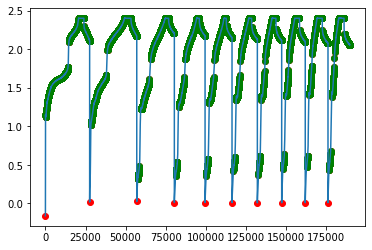

In [155]:
plt.scatter(df2.index, df2['min'], c='r')
plt.scatter(df2.index, df2['max'], c='g')
plt.plot(df2.index, df2['Ewe/V'])
plt.show()

### Algorithm imports

In [7]:
from sklearn import svm
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [43]:
dfs[3]['Ewe/V'].min()

-0.0006250475416891277